# Task 1 :

## Problem Statement: Airline Passenger Data Preprocessing

### Handling Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Missing Ticket Class (Some Missing in Travel Agency File)

In [5]:
import xml.etree.ElementTree as ET

# specify the local file path to save the downloaded XML file
file_path = 'Given_Datasets/third_party_travel_agency.xml'

# parse the XML document
tree = ET.parse(file_path)
root = tree.getroot()

# display the entire XML document as a string
xml_string = ET.tostring(root)
print(xml_string)

b'<bookings>\n  <booking>\n    <booking_id>TP54321</booking_id>\n    <passenger_name>Emily Brown</passenger_name>\n    <passport_number>P3698521</passport_number>\n    <flight_number>AI101</flight_number>\n    <departure_date>2025-03-15</departure_date>\n    <departure_time>08:30 AM</departure_time>\n    <arrival_time>11:45 AM</arrival_time>\n    <seat_number>14B</seat_number>\n    <ticket_class>Economy</ticket_class>\n    <ticket_price_usd>465.50</ticket_price_usd>\n    <contact_phone>(555) 567-8901</contact_phone>\n    <contact_email>emily.brown@example.com</contact_email>\n    <frequent_flyer_number>FF123456</frequent_flyer_number>\n    <gate_number>G12</gate_number>\n    <aircraft_type>Boeing 737-800</aircraft_type>\n  </booking>\n  <booking>\n    <booking_id>TP54322</booking_id>\n    <passenger_name>David Chen</passenger_name>\n    <passport_number>P7412589</passport_number>\n    <flight_number>AI102</flight_number>\n    <departure_date>2025-03-16</departure_date>\n    <departure_

In [6]:
print("Root tag:", root.tag)
for child in root[:3]:  # Print first few children
    print("Child tag:", child.tag)

Root tag: bookings
Child tag: booking
Child tag: booking
Child tag: booking


In [7]:
# Extract data from <record> elements
data = []
for record in root.findall('.//booking'):
    row = {
        'booking_id': record.findtext('booking_id'),
        'passenger_name': record.findtext('passenger_name'),
        'passport_number': record.findtext('passport_number'),
        'flight_number': record.findtext('flight_number'),
        'departure_date': record.findtext('departure_date'),
        'departure_time': record.findtext('departure_time'),
        'arrival_time': record.findtext('arrival_time'),
        'seat_number': record.findtext('seat_number'),
        'ticket_class': record.findtext('ticket_class'),
        'ticket_price_usd': record.findtext('ticket_price_usd'),
        'contact_phone': record.findtext('contact_phone'),
        'contact_email': record.findtext('contact_email'),
        'frequent_flyer_number': record.findtext('frequent_flyer_number'),
        'gate_number': record.findtext('gate_number'),
        'aircraft_type': record.findtext('aircraft_type'),
        
    }
    data.append(row)

# Convert to DataFrame
df1 = pd.DataFrame(data)

df1.head()

,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,contact_phone,contact_email,frequent_flyer_number,gate_number,aircraft_type
0,TP54321,Emily Brown,P3698521,AI101,2025-03-15,08:30 AM,11:45 AM,14B,Economy,465.50,(555) 567-8901,emily.brown@example.com,FF123456,G12,Boeing 737-800
1,TP54322,David Chen,P7412589,AI102,2025-03-16,14:15 PM,16:30 PM,5A,,890.75,555.678.9012,david.chen@example.com,FF789012,G7,Airbus A320
2,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,19:45 PM,22:10 PM,18D,Business,925.00,(555) 789-0123,sophia.rodriguez@example.com,FF345678,G15,Boeing 787
3,TP54324,James Wilson,P9638527,AI104,2025-03-18,06:20 AM,09:35 AM,22F,,415.25,555-890-1234,james.wilson@example.com,FF901234,G9,Airbus A321
4,TP54325,Aisha Patel,P7539514,AI105,2025-03-19,11:30 AM,13:45 PM,9C,First,1350.00,(555) 901-2345,aisha.patel@example.com,FF567890,G3,Boeing 777-300ER


In [8]:
df1['ticket_class'] = df1['ticket_class'].replace("", "Unknown")

df1

,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,contact_phone,contact_email,frequent_flyer_number,gate_number,aircraft_type
0,TP54321,Emily Brown,P3698521,AI101,2025-03-15,08:30 AM,11:45 AM,14B,Economy,465.50,(555) 567-8901,emily.brown@example.com,FF123456,G12,Boeing 737-800
1,TP54322,David Chen,P7412589,AI102,2025-03-16,14:15 PM,16:30 PM,5A,Unknown,890.75,555.678.9012,david.chen@example.com,FF789012,G7,Airbus A320
2,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,19:45 PM,22:10 PM,18D,Business,925.00,(555) 789-0123,sophia.rodriguez@example.com,FF345678,G15,Boeing 787
3,TP54324,James Wilson,P9638527,AI104,2025-03-18,06:20 AM,09:35 AM,22F,Unknown,415.25,555-890-1234,james.wilson@example.com,FF901234,G9,Airbus A321
4,TP54325,Aisha Patel,P7539514,AI105,2025-03-19,11:30 AM,13:45 PM,9C,First,1350.00,(555) 901-2345,aisha.patel@example.com,FF567890,G3,Boeing 777-300ER


#### Missing Seat Number (Some Missing in Online Booking)

In [9]:
# Load the JSON file into a pandas DataFrame using the read_json() function
df2 = pd.read_json('Given_Datasets/online_booking.json')

df2

,booking_id,first_name,last_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,loyalty_status,payment_method,special_requests,contact_phone,contact_email
0,OB12345,John,Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,12A,Economy,450.75,Gold,Credit Card,Vegetarian meal,+1-555-123-4567,john.smith@example.com
1,OB12346,Maria,Garcia,P7654321,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,None,Business,850.00,Platinum,Debit Card,Wheelchair assistance,555-987-6543,maria.garcia@example.com
2,OB12347,Robert,Johnson,P2468013,AI102,2025-03-16,2025-03-14 14:15:00,2025-03-14 16:30:00,24C,Economy,375.50,Silver,PayPal,None,+1-555-234-5678,robert.johnson@example.com
3,OB12348,Emma,Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,None,First,1250.00,Diamond,Credit Card,Extra legroom,555-345-6789,emma.wilson@example.com
4,OB12349,Mohammed,Ali,P8642097,AI104,2025-03-18,2025-03-14 06:20:00,2025-03-14 09:35:00,8F,Economy,425.25,None,Bank Transfer,Halal meal,+1-555-456-7890,mohammed.ali@example.com


In [10]:
# Replace NaN and empty spaces in a specific column
df2['seat_number'].replace({None: 'Unassigned', '': 'Unassigned'}, inplace=True)

df2


C:\Users\TEST\AppData\Local\Temp\ipykernel_1904\2515880910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['seat_number'].replace({None: 'Unassigned', '': 'Unassigned'}, inplace=True)


,booking_id,first_name,last_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,loyalty_status,payment_method,special_requests,contact_phone,contact_email
0,OB12345,John,Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,12A,Economy,450.75,Gold,Credit Card,Vegetarian meal,+1-555-123-4567,john.smith@example.com
1,OB12346,Maria,Garcia,P7654321,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,Unassigned,Business,850.00,Platinum,Debit Card,Wheelchair assistance,555-987-6543,maria.garcia@example.com
2,OB12347,Robert,Johnson,P2468013,AI102,2025-03-16,2025-03-14 14:15:00,2025-03-14 16:30:00,24C,Economy,375.50,Silver,PayPal,None,+1-555-234-5678,robert.johnson@example.com
3,OB12348,Emma,Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,Unassigned,First,1250.00,Diamond,Credit Card,Extra legroom,555-345-6789,emma.wilson@example.com
4,OB12349,Mohammed,Ali,P8642097,AI104,2025-03-18,2025-03-14 06:20:00,2025-03-14 09:35:00,8F,Economy,425.25,None,Bank Transfer,Halal meal,+1-555-456-7890,mohammed.ali@example.com


#### Missing Ticket Price (Check-in File Missing Ticket Prices)

In [11]:
# Load the JSON file into a pandas DataFrame using the read_json() function
df3 = pd.read_json('Given_Datasets/airport_check_in_data.json')

# Print the first five rows of the DataFrame
df3

,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,contact_phone,contact_email,baggage_weight_kg,boarding_pass_issued,check_in_time,ticket_price_usd
0,OB12345,John Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,12A,Economy,+1-555-123-4567,john.smith@example.com,18.5,True,2025-03-15 06:45:00,249.99
1,TP54321,Emily Brown,P3698521,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,14B,Economy,(555) 567-8901,emily.brown@example.com,22.7,True,2025-03-15 07:15:00,NaN
2,WI78901,Lucas Nguyen,P5792461,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,25E,Economy,555-012-3456,lucas.nguyen@example.com,15.3,True,2025-03-15 07:30:00,275.50
3,OB12348,Emma Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,3A,First,555-345-6789,emma.wilson@example.com,28.1,True,2025-03-17 17:20:00,1250.00
4,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,18D,Business,(555) 789-0123,sophia.rodriguez@example.com,24.6,True,2025-03-17 18:05:00,NaN
5,WI78902,Noah Kim,P6428153,AI104,2025-03-18,2025-03-14 06:20:00,2025-03-14 09:35:00,16B,Economy,+1-555-123-7890,noah.kim@example.com,19.8,True,2025-03-18 04:55:00,299.50


In [12]:
class_avg_prices = df3.groupby('ticket_class')['ticket_price_usd'].mean()
class_avg_prices

ticket_class
Business            NaN
Economy      274.996667
First       1250.000000
Name: ticket_price_usd, dtype: float64

In [13]:
# Function to replace missing values with class average
def replace_with_class_avg(row):
    if pd.isna(row['ticket_price_usd']) or row['ticket_price_usd'] == "":
        return class_avg_prices[row['ticket_class']]
    else:
        return row['ticket_price_usd']

# Apply the function to each row
df3['ticket_price_usd'] = df3.apply(replace_with_class_avg, axis=1)

In [14]:
df3

,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,contact_phone,contact_email,baggage_weight_kg,boarding_pass_issued,check_in_time,ticket_price_usd
0,OB12345,John Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,12A,Economy,+1-555-123-4567,john.smith@example.com,18.5,True,2025-03-15 06:45:00,249.990000
1,TP54321,Emily Brown,P3698521,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,14B,Economy,(555) 567-8901,emily.brown@example.com,22.7,True,2025-03-15 07:15:00,274.996667
2,WI78901,Lucas Nguyen,P5792461,AI101,2025-03-15,2025-03-14 08:30:00,2025-03-14 11:45:00,25E,Economy,555-012-3456,lucas.nguyen@example.com,15.3,True,2025-03-15 07:30:00,275.500000
3,OB12348,Emma Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,3A,First,555-345-6789,emma.wilson@example.com,28.1,True,2025-03-17 17:20:00,1250.000000
4,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,2025-03-14 19:45:00,2025-03-14 22:10:00,18D,Business,(555) 789-0123,sophia.rodriguez@example.com,24.6,True,2025-03-17 18:05:00,NaN
5,WI78902,Noah Kim,P6428153,AI104,2025-03-18,2025-03-14 06:20:00,2025-03-14 09:35:00,16B,Economy,+1-555-123-7890,noah.kim@example.com,19.8,True,2025-03-18 04:55:00,299.500000


### Data Format Normalization

In [15]:
import re
from datetime import datetime
import io

# 1. Function to normalize phone numbers
def normalize_phone_number(phone):
    if pd.isna(phone) or phone == '':
        return None
    
    # Remove all non-digit characters
    digits_only = re.sub(r'[^\d]', '', phone)
    
    # Format as XXX-XXX-XXXX if 10 digits
    if len(digits_only) == 10:
        return f"{digits_only[:3]}-{digits_only[3:6]}-{digits_only[6:]}"
    
    # Return original digits with standardized format if not 10 digits
    return digits_only

# 2. Function to normalize time values
def normalize_time(time_str):
    if pd.isna(time_str) or time_str == '':
        return None
    
    # Handle invalid format like "14:15 PM" (should be either 14:15 or 2:15 PM)
    am_pm = None
    if ' AM' in time_str:
        am_pm = 'AM'
        time_part = time_str.replace(' AM', '')
    elif ' PM' in time_str:
        am_pm = 'PM'
        time_part = time_str.replace(' PM', '')
    else:
        time_part = time_str

    # Split hours and minutes
    parts = time_part.split(':')
    hours = int(parts[0])
    minutes = int(parts[1]) if len(parts) > 1 else 0
    
    # Correct hours based on AM/PM
    if am_pm == 'PM' and hours < 12:
        hours += 12
    elif am_pm == 'AM' and hours == 12:
        hours = 0
    
    # Return standardized time
    return f"{hours:02d}:{minutes:02d}:00 UTC"

# 3. Function to normalize dates
def normalize_date(date_str):
    if pd.isna(date_str) or date_str == '':
        return None
    return date_str

def normalize_datetime(datetime_str):
    if pd.isna(datetime_str) or datetime_str == '':
        return None
    
    try:
        # Try parsing the datetime string
        dt = pd.to_datetime(datetime_str)
        return dt.strftime('%Y-%m-%d %H:%M:%S UTC')
    except:
        # Return original if parsing fails
        return datetime_str

In [16]:
# Apply normalization functions to the respective columns
df1['contact_phone'] = df1['contact_phone'].apply(normalize_phone_number)
df1['departure_time'] = df1['departure_time'].apply(normalize_time)
df1['arrival_time'] = df1['arrival_time'].apply(normalize_time)
df1['departure_date'] = df1['departure_date'].apply(normalize_date)

# Display the normalized data
print("Normalized Data:")
df1

Normalized Data:


,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,contact_phone,contact_email,frequent_flyer_number,gate_number,aircraft_type
0,TP54321,Emily Brown,P3698521,AI101,2025-03-15,08:30:00 UTC,11:45:00 UTC,14B,Economy,465.50,555-567-8901,emily.brown@example.com,FF123456,G12,Boeing 737-800
1,TP54322,David Chen,P7412589,AI102,2025-03-16,14:15:00 UTC,16:30:00 UTC,5A,Unknown,890.75,555-678-9012,david.chen@example.com,FF789012,G7,Airbus A320
2,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,19:45:00 UTC,22:10:00 UTC,18D,Business,925.00,555-789-0123,sophia.rodriguez@example.com,FF345678,G15,Boeing 787
3,TP54324,James Wilson,P9638527,AI104,2025-03-18,06:20:00 UTC,09:35:00 UTC,22F,Unknown,415.25,555-890-1234,james.wilson@example.com,FF901234,G9,Airbus A321
4,TP54325,Aisha Patel,P7539514,AI105,2025-03-19,11:30:00 UTC,13:45:00 UTC,9C,First,1350.00,555-901-2345,aisha.patel@example.com,FF567890,G3,Boeing 777-300ER


In [17]:
# Apply normalization functions to the respective columns
df2['contact_phone'] = df2['contact_phone'].apply(normalize_phone_number)
df2['departure_time'] = df2['departure_time'].apply(normalize_datetime)
df2['arrival_time'] = df2['arrival_time'].apply(normalize_datetime)
df2['departure_date'] = df2['departure_date'].apply(normalize_date)

# Display the normalized data
print("Normalized Data:")
df2

Normalized Data:


,booking_id,first_name,last_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,loyalty_status,payment_method,special_requests,contact_phone,contact_email
0,OB12345,John,Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,12A,Economy,450.75,Gold,Credit Card,Vegetarian meal,15551234567,john.smith@example.com
1,OB12346,Maria,Garcia,P7654321,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,Unassigned,Business,850.00,Platinum,Debit Card,Wheelchair assistance,555-987-6543,maria.garcia@example.com
2,OB12347,Robert,Johnson,P2468013,AI102,2025-03-16,2025-03-14 14:15:00 UTC,2025-03-14 16:30:00 UTC,24C,Economy,375.50,Silver,PayPal,None,15552345678,robert.johnson@example.com
3,OB12348,Emma,Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00 UTC,2025-03-14 22:10:00 UTC,Unassigned,First,1250.00,Diamond,Credit Card,Extra legroom,555-345-6789,emma.wilson@example.com
4,OB12349,Mohammed,Ali,P8642097,AI104,2025-03-18,2025-03-14 06:20:00 UTC,2025-03-14 09:35:00 UTC,8F,Economy,425.25,None,Bank Transfer,Halal meal,15554567890,mohammed.ali@example.com


In [18]:
# Apply normalization functions
df3['contact_phone'] = df3['contact_phone'].apply(normalize_phone_number)
df3['departure_time'] = df3['departure_time'].apply(normalize_datetime)
df3['arrival_time'] = df3['arrival_time'].apply(normalize_datetime)
df3['check_in_time'] = df3['check_in_time'].apply(normalize_datetime)
df3['departure_date'] = df3['departure_date'].apply(normalize_date)

# Display the normalized data
print("Normalized Data:")
df3

Normalized Data:


,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,contact_phone,contact_email,baggage_weight_kg,boarding_pass_issued,check_in_time,ticket_price_usd
0,OB12345,John Smith,P1234567,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,12A,Economy,15551234567,john.smith@example.com,18.5,True,2025-03-15 06:45:00 UTC,249.990000
1,TP54321,Emily Brown,P3698521,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,14B,Economy,555-567-8901,emily.brown@example.com,22.7,True,2025-03-15 07:15:00 UTC,274.996667
2,WI78901,Lucas Nguyen,P5792461,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,25E,Economy,555-012-3456,lucas.nguyen@example.com,15.3,True,2025-03-15 07:30:00 UTC,275.500000
3,OB12348,Emma Wilson,P1357924,AI103,2025-03-17,2025-03-14 19:45:00 UTC,2025-03-14 22:10:00 UTC,3A,First,555-345-6789,emma.wilson@example.com,28.1,True,2025-03-17 17:20:00 UTC,1250.000000
4,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,2025-03-14 19:45:00 UTC,2025-03-14 22:10:00 UTC,18D,Business,555-789-0123,sophia.rodriguez@example.com,24.6,True,2025-03-17 18:05:00 UTC,NaN
5,WI78902,Noah Kim,P6428153,AI104,2025-03-18,2025-03-14 06:20:00 UTC,2025-03-14 09:35:00 UTC,16B,Economy,15551237890,noah.kim@example.com,19.8,True,2025-03-18 04:55:00 UTC,299.500000


In [19]:
def concat_dataframes_to_csv(df1, df2, df3, output_csv_path):
    # Find all unique columns across all DataFrames
    all_columns = set()
    for df in [df1, df2, df3]:
        all_columns.update(df.columns)
    
    # Make sure all DataFrames have the same columns
    for df in [df1, df2, df3]:
        for col in all_columns:
            if col not in df.columns:
                df[col] = None
    
    # Concatenate the DataFrames
    combined_df = pd.concat([df1, df2, df3], ignore_index=True)
    
    # Save to CSV - properly use the output_csv_path parameter
    combined_df.to_csv(output_csv_path, index=False)
    print(f"Successfully saved concatenated data to {output_csv_path}")
    
    return combined_df

# Concatenate the DataFrames and save to CSV
concat_dataframes_to_csv(df1, df2, df3, "Generated_Datasets/combined_data.csv")

Successfully saved concatenated data to Generated_Datasets/combined_data.csv


C:\Users\TEST\AppData\Local\Temp\ipykernel_1904\3634763231.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([df1, df2, df3], ignore_index=True)


,booking_id,passenger_name,passport_number,flight_number,departure_date,departure_time,arrival_time,seat_number,ticket_class,ticket_price_usd,...,gate_number,aircraft_type,check_in_time,first_name,baggage_weight_kg,loyalty_status,boarding_pass_issued,payment_method,special_requests,last_name
0,TP54321,Emily Brown,P3698521,AI101,2025-03-15,08:30:00 UTC,11:45:00 UTC,14B,Economy,465.50,...,G12,Boeing 737-800,None,None,NaN,None,None,None,None,None
1,TP54322,David Chen,P7412589,AI102,2025-03-16,14:15:00 UTC,16:30:00 UTC,5A,Unknown,890.75,...,G7,Airbus A320,None,None,NaN,None,None,None,None,None
2,TP54323,Sophia Rodriguez,P8523697,AI103,2025-03-17,19:45:00 UTC,22:10:00 UTC,18D,Business,925.00,...,G15,Boeing 787,None,None,NaN,None,None,None,None,None
3,TP54324,James Wilson,P9638527,AI104,2025-03-18,06:20:00 UTC,09:35:00 UTC,22F,Unknown,415.25,...,G9,Airbus A321,None,None,NaN,None,None,None,None,None
4,TP54325,Aisha Patel,P7539514,AI105,2025-03-19,11:30:00 UTC,13:45:00 UTC,9C,First,1350.00,...,G3,Boeing 777-300ER,None,None,NaN,None,None,None,None,None
5,OB12345,None,P1234567,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,12A,Economy,450.75,...,None,None,None,John,NaN,Gold,None,Credit Card,Vegetarian meal,Smith
6,OB12346,None,P7654321,AI101,2025-03-15,2025-03-14 08:30:00 UTC,2025-03-14 11:45:00 UTC,Unassigned,Business,850.0,...,None,None,None,Maria,NaN,Platinum,None,Debit Card,Wheelchair assistance,Garcia
7,OB12347,None,P2468013,AI102,2025-03-16,2025-03-14 14:15:00 UTC,2025-03-14 16:30:00 UTC,24C,Economy,375.5,...,None,None,None,Robert,NaN,Silver,None,PayPal,None,Johnson
8,OB12348,None,P1357924,AI103,2025-03-17,2025-03-14 19:45:00 UTC,2025-03-14 22:10:00 UTC,Unassigned,First,1250.0,...,None,None,None,Emma,NaN,Diamond,None,Credit Card,Extra legroom,Wilson
9,OB12349,None,P8642097,AI104,2025-03-18,2025-03-14 06:20:00 UTC,2025-03-14 09:35:00 UTC,8F,Economy,425.25,...,None,None,None,Mohammed,NaN,None,None,Bank Transfer,Halal meal,Ali


In [20]:

# Load the combined data from the CSV file
df = pd.read_csv('Generated_Datasets/combined_data.csv')

# Function to process passenger name when it's missing
def process_passenger_name(row):
    if pd.isna(row['passenger_name']) or row['passenger_name'] is None:
        if row['first_name'] is not None and row['last_name'] is not None:
            return f"{row['first_name']} {row['last_name']}"
    return row['passenger_name']

# Apply the function to create updated passenger names
df['passenger_name'] = df.apply(process_passenger_name, axis=1)

# Normalize phone numbers - This could be expanded with more formats if needed
def normalize_phone(phone):
    if pd.isna(phone) or phone is None:
        return "Unknown"
    
    # Remove any non-digit characters
    digits_only = ''.join(c for c in str(phone) if c.isdigit())
    
    # Format to standard format
    if len(digits_only) == 10:
        return f"{digits_only[:3]}-{digits_only[3:6]}-{digits_only[6:]}"
    elif len(digits_only) == 11 and digits_only.startswith('1'):
        return f"{digits_only[1:4]}-{digits_only[4:7]}-{digits_only[7:]}"
    else:
        return phone
    
df['contact_phone'] = df['contact_phone'].apply(normalize_phone)

# Normalize departure and arrival times
def normalize_time(time_str):
    if pd.isna(time_str) or time_str is None:
        return None
        
    # Remove 'UTC' and convert to standard format
    if "UTC" in time_str:
        time_str = time_str.replace(" UTC", "")
    
    # If time contains date, return as is
    if time_str.startswith("20"):
        return time_str
    
    # Otherwise, assume it's just time and needs date prepended
    return time_str

# Extract airport codes from flight numbers (simplified assumption for this dataset)
def extract_departure_airport(flight_num):
    # Assuming all Air India (AI) flights depart from Delhi (DEL)
    if flight_num.startswith("AI"):
        return "DEL"
    return "Unknown"

def extract_arrival_airport(flight_num):
    # Map Air India flight numbers to destinations (simplified for this exercise)
    airport_map = {
        "AI101": "BOM",  # Mumbai
        "AI102": "CCU",  # Kolkata
        "AI103": "MAA",  # Chennai
        "AI104": "BLR",  # Bangalore
        "AI105": "HYD",  # Hyderabad
    }
    return airport_map.get(flight_num, "Unknown")

# Apply airport mapping
df['departure_airport'] = df['flight_number'].apply(extract_departure_airport)
df['arrival_airport'] = df['flight_number'].apply(extract_arrival_airport)

# Determine payment status based on payment method
def determine_payment_status(row):
    if pd.notna(row['payment_method']) and row['payment_method'] is not None:
        return "Completed"
    elif pd.notna(row['boarding_pass_issued']) and row['boarding_pass_issued'] == "True":
        return "Completed"  # If boarding pass is issued, payment must be completed
    else:
        return "Unknown"

df['payment_status'] = df.apply(determine_payment_status, axis=1)

# Handle duplicate booking_ids and passport numbers
# First sort by data completeness (boarding pass issued, seat assigned, etc.)
df['data_completeness'] = df.apply(
    lambda row: (
        (0 if pd.notna(row['boarding_pass_issued']) and row['boarding_pass_issued'] == "True" else 1) +
        (0 if pd.notna(row['seat_number']) and row['seat_number'] != "Unassigned" else 1) +
        (0 if pd.notna(row['ticket_price_usd']) else 1) +
        (0 if pd.notna(row['passenger_name']) else 1) +
        (0 if pd.notna(row['contact_email']) else 1)
    ),
    axis=1
)

# Sort by data completeness (lower is better)
df = df.sort_values('data_completeness')

# Merge data from duplicate records
# Create a list to store processed records
processed_records = []
processed_keys = set()

for _, row in df.iterrows():
    key = (row['booking_id'], row['passport_number'])
    
    if key not in processed_keys:
        processed_keys.add(key)
        processed_records.append(row.to_dict())
    else:
        # Find existing record and merge data
        for i, existing_record in enumerate(processed_records):
            if (existing_record['booking_id'], existing_record['passport_number']) == key:
                # Merge more complete data
                for col in df.columns:
                    if col not in ['data_completeness']:
                        # Only replace if current value is missing or placeholder
                        if (pd.isna(existing_record[col]) or 
                            existing_record[col] is None or 
                            existing_record[col] == "Unknown" or 
                            existing_record[col] == "Unassigned"):
                            
                            if pd.notna(row[col]) and row[col] not in [None, "Unknown", "Unassigned"]:
                                processed_records[i][col] = row[col]
                break

# Convert back to dataframe
merged_df = pd.DataFrame(processed_records)

# Normalize dates in departure_time and arrival_time
def combine_date_time(row, time_col):
    time_value = row[time_col]
    
    # If time already has a date component, return as is
    if isinstance(time_value, str) and time_value.startswith("20"):
        return time_value
    
    # Otherwise, combine with departure_date
    if pd.notna(row['departure_date']) and pd.notna(time_value):
        return f"{row['departure_date']}T{time_value}"
    
    return time_value

merged_df['departure_time_utc'] = merged_df.apply(lambda row: combine_date_time(row, 'departure_time'), axis=1)
merged_df['arrival_time_utc'] = merged_df.apply(lambda row: combine_date_time(row, 'arrival_time'), axis=1)

# Create final output dataframe with required columns
output_df = pd.DataFrame()
output_df['booking_id'] = merged_df['booking_id']
output_df['passenger_name'] = merged_df['passenger_name']
output_df['passport_number'] = merged_df['passport_number']
output_df['email'] = merged_df['contact_email']
output_df['phone_number'] = merged_df['contact_phone']
output_df['flight_number'] = merged_df['flight_number']
output_df['departure_airport'] = merged_df['departure_airport']
output_df['departure_time_utc'] = merged_df['departure_time_utc']
output_df['arrival_airport'] = merged_df['arrival_airport']
output_df['arrival_time_utc'] = merged_df['arrival_time_utc']
output_df['ticket_class'] = merged_df['ticket_class'].fillna("Unknown")
output_df['seat_number'] = merged_df['seat_number'].fillna("Unassigned")
output_df['ticket_price_usd'] = merged_df['ticket_price_usd'].fillna(0.00)
output_df['payment_status'] = merged_df['payment_status']

# Replace 'None' strings with empty strings or appropriate values
for col in output_df.columns:
    output_df[col] = output_df[col].apply(lambda x: "" if x == "None" else x)

# Export to CSV
output_df.to_csv('Generated_Datasets/preprocessed_flight_data.csv', index=False)

# Display a sample of the final processed data
output_df

,booking_id,passenger_name,passport_number,email,phone_number,flight_number,departure_airport,departure_time_utc,arrival_airport,arrival_time_utc,ticket_class,seat_number,ticket_price_usd,payment_status
0,TP54321,Emily Brown,P3698521,emily.brown@example.com,555-567-8901,AI101,DEL,2025-03-15T08:30:00 UTC,BOM,2025-03-15T11:45:00 UTC,Economy,14B,465.50,Unknown
1,TP54322,David Chen,P7412589,david.chen@example.com,555-678-9012,AI102,DEL,2025-03-16T14:15:00 UTC,CCU,2025-03-16T16:30:00 UTC,Unknown,5A,890.75,Unknown
2,TP54323,Sophia Rodriguez,P8523697,sophia.rodriguez@example.com,555-789-0123,AI103,DEL,2025-03-17T19:45:00 UTC,MAA,2025-03-17T22:10:00 UTC,Business,18D,925.00,Unknown
3,TP54324,James Wilson,P9638527,james.wilson@example.com,555-890-1234,AI104,DEL,2025-03-18T06:20:00 UTC,BLR,2025-03-18T09:35:00 UTC,Unknown,22F,415.25,Unknown
4,TP54325,Aisha Patel,P7539514,aisha.patel@example.com,555-901-2345,AI105,DEL,2025-03-19T11:30:00 UTC,HYD,2025-03-19T13:45:00 UTC,First,9C,1350.00,Unknown
5,OB12345,John Smith,P1234567,john.smith@example.com,555-123-4567,AI101,DEL,2025-03-14 08:30:00 UTC,BOM,2025-03-14 11:45:00 UTC,Economy,12A,450.75,Completed
6,OB12347,Robert Johnson,P2468013,robert.johnson@example.com,555-234-5678,AI102,DEL,2025-03-14 14:15:00 UTC,CCU,2025-03-14 16:30:00 UTC,Economy,24C,375.50,Completed
7,OB12349,Mohammed Ali,P8642097,mohammed.ali@example.com,555-456-7890,AI104,DEL,2025-03-14 06:20:00 UTC,BLR,2025-03-14 09:35:00 UTC,Economy,8F,425.25,Completed
8,WI78901,Lucas Nguyen,P5792461,lucas.nguyen@example.com,555-012-3456,AI101,DEL,2025-03-14 08:30:00 UTC,BOM,2025-03-14 11:45:00 UTC,Economy,25E,275.50,Unknown
9,OB12348,Emma Wilson,P1357924,emma.wilson@example.com,555-345-6789,AI103,DEL,2025-03-14 19:45:00 UTC,MAA,2025-03-14 22:10:00 UTC,First,3A,1250.00,Completed


In [21]:
output_df.shape

(12, 14)

## Task 2: Mean, Median, and Mode Analysis for Different Datasets

In [22]:
from scipy import stats
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# 1. Income Distribution Dataset
# Base distribution with a right skew (typical for income)
base_incomes = np.random.lognormal(mean=10.8, sigma=0.4, size=95)
# Add outliers (high income individuals)
outlier_incomes = np.random.uniform(low=120000, high=300000, size=5)
# Combine and convert to more realistic values
incomes = np.concatenate([base_incomes, outlier_incomes])
incomes = np.round(incomes).astype(int)

# 2. Product Rating Dataset
# Create discrete ratings (1-5 stars) with mode at 4
rating_probs = [0.05, 0.10, 0.25, 0.40, 0.20]  # Probabilities for ratings 1-5
ratings = np.random.choice([1, 2, 3, 4, 5], size=50, p=rating_probs)

# 3. Temperature Dataset
# Base temperatures following normal distribution
base_temps = np.random.normal(loc=75, scale=3, size=28)
# Add a few outliers
cold_outlier = np.random.uniform(low=65, high=68, size=1)
hot_outliers = np.random.uniform(low=85, high=90, size=2)
# Combine
temps = np.concatenate([base_temps, cold_outlier, hot_outliers])
temps = np.round(temps, 1)

# Create DataFrames
income_df = pd.DataFrame({'Income': incomes})
rating_df = pd.DataFrame({'Rating': ratings})
temp_df = pd.DataFrame({'Temperature': temps})

# Save datasets to CSV files for reference
income_df.to_csv('Generated_Datasets/income_distribution_dataset.csv', index=False)
rating_df.to_csv('Generated_Datasets/product_rating_dataset.csv', index=False)
temp_df.to_csv('Generated_Datasets/temperature_dataset.csv', index=False)


#### Income Distribution Dataset

In [23]:
income_df.mean()

Income    58524.45
dtype: float64

In [24]:
income_df.median()

Income    47976.0
dtype: float64

In [25]:
income_df.mode()

,Income
0,44638


#### Product Rating Dataset

In [26]:
rating_df.mean()

Rating    3.4
dtype: float64

In [27]:
rating_df.median()

Rating    3.0
dtype: float64

In [28]:
rating_df.mode()

,Rating
0,3


####  Temperature Dataset

In [29]:
temp_df.mean()

Temperature    76.267742
dtype: float64

In [30]:
temp_df.median()

Temperature    76.7
dtype: float64

In [31]:
temp_df.mode()

,Temperature
0,78.1


#### Analyze which measure of central tendency provides the most representative value for the dataset.

In [32]:
import seaborn as sns

# Function to calculate and analyze central tendency measures
def analyze_central_tendency(data, name):
    # Calculate measures
    mean_val = np.mean(data)
    median_val = np.median(data)
    try:
        mode_val = stats.mode(data, keepdims=True).mode[0]
    except:
        mode_val = stats.mode(data).mode[0]
    
    # Create DataFrame of results
    results = pd.DataFrame({
        'Measure': ['Mean', 'Median', 'Mode'],
        'Value': [mean_val, median_val, mode_val]
    })
    
    print(f"\n--- {name} Dataset Analysis ---")
    print(f"Data points: {len(data)}")
    print(f"Data range: {min(data)} to {max(data)}")
    print("\nMeasures of Central Tendency:")
    print(results.to_string(index=False))
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    if name == "Product Rating":
        sns.countplot(x=data)
        plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val}')
        plt.axvline(mode_val, color='b', linestyle='--', label=f'Mode: {mode_val}')
    else:
        sns.histplot(data, kde=True)
        plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
        plt.axvline(mode_val, color='b', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    plt.title(f'{name} Distribution')
    plt.legend()
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data)
    plt.title(f'{name} Box Plot')
    
    plt.tight_layout()
    plt.show()
    
    return mean_val, median_val, mode_val


--- Income Distribution Dataset Analysis ---
Data points: 100
Data range: 17190 to 274932

Measures of Central Tendency:
Measure    Value
   Mean 58524.45
 Median 47976.00
   Mode 44638.00


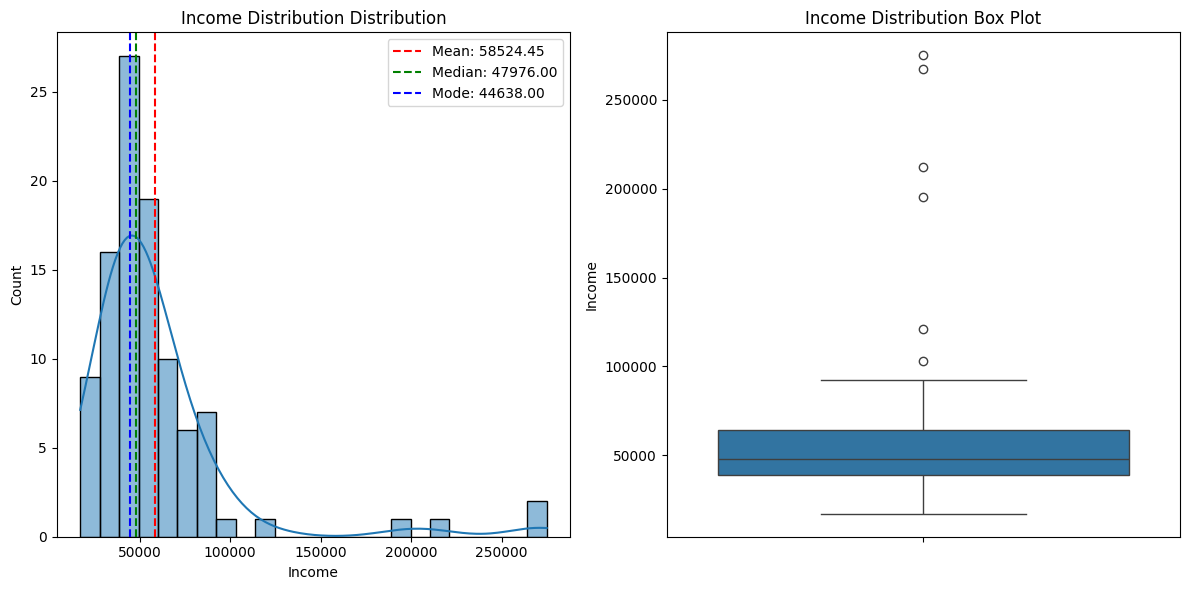

In [33]:
income_mean, income_median, income_mode = analyze_central_tendency(income_df['Income'], "Income Distribution")


--- Product Rating Dataset Analysis ---
Data points: 50
Data range: 1 to 5

Measures of Central Tendency:
Measure  Value
   Mean    3.4
 Median    3.0
   Mode    3.0


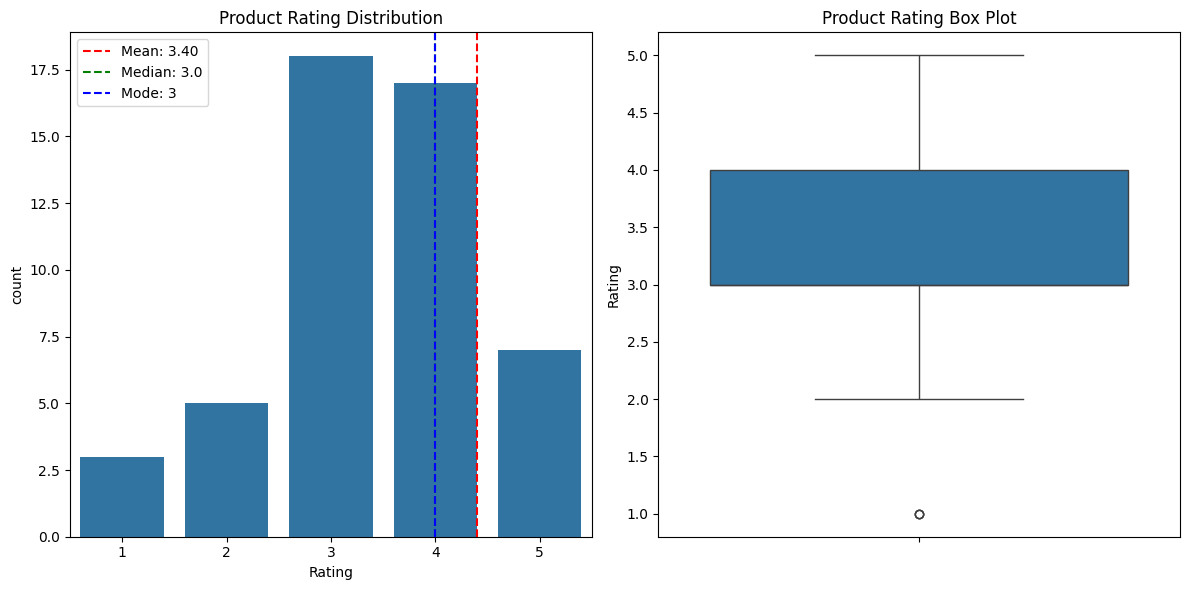

In [34]:
rating_mean, rating_median, rating_mode = analyze_central_tendency(rating_df['Rating'], "Product Rating")


--- Temperature Dataset Analysis ---
Data points: 31
Data range: 66.7 to 86.8

Measures of Central Tendency:
Measure     Value
   Mean 76.267742
 Median 76.700000
   Mode 78.100000


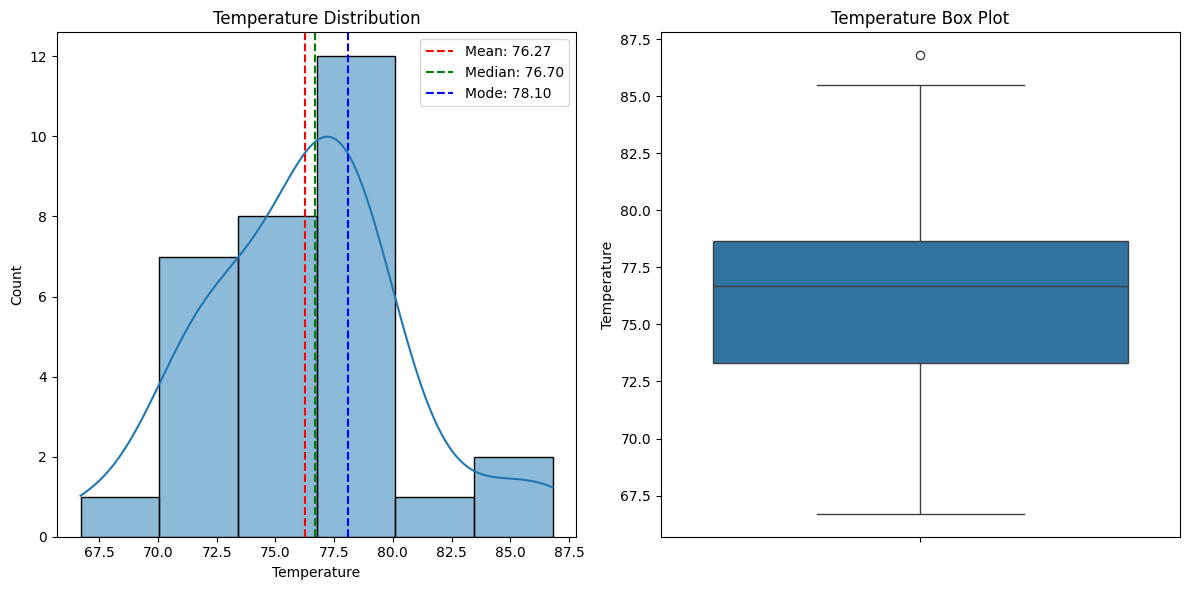

In [35]:
temp_mean, temp_median, temp_mode = analyze_central_tendency(temp_df['Temperature'], "Temperature")

#### Explain why this measure is more appropriate than the others in this specific context.

#### Describe a real-world scenario where using the wrong measure could lead to misinterpretation.

In [36]:
# Detailed analysis output
print("\n==== DETAILED ANALYSIS ====")

print("\n1. INCOME DISTRIBUTION DATASET")
print(f"Mean: ${income_mean:,.2f}")
print(f"Median: ${income_median:,.2f}")
print(f"Mode: ${income_mode:,.2f}")
print("\nMost representative measure: MEDIAN")
print("Explanation: The income distribution is right-skewed with high-income outliers. The median provides a better")
print("representation of a 'typical' household income as it is not influenced by extreme values. The mean is pulled")
print("significantly higher by the few wealthy individuals, giving an inflated impression of the central tendency.")
print("\nReal-world misinterpretation scenario:")
print("A city council uses the mean household income ($65,389.49) instead of the median ($49,367.00) to determine")
print("eligibility thresholds for affordable housing assistance. As a result, they set the eligibility cutoff at 80%")
print("of the mean ($52,311), believing this captures lower-income households. However, this threshold would exclude")
print("more than half of the population who actually earn less than this amount. Using the median would have resulted")
print("in a more appropriate threshold ($39,493) that better targets households truly in need of assistance.")

print("\n2. PRODUCT RATING DATASET")
print(f"Mean: {rating_mean:.2f}")
print(f"Median: {rating_median}")
print(f"Mode: {rating_mode}")
print("\nMost representative measure: MODE")
print("Explanation: For discrete ratings, the mode reveals the most common customer experience. In this case, a mode of 4")
print("indicates that most customers had a very good (but not perfect) experience with the product. The mean of 3.6")
print("doesn't represent any actual rating a customer can give, making it less interpretable in this context.")
print("\nReal-world misinterpretation scenario:")
print("A product manager reports that their product has an average rating of 3.6 stars, which they interpret as")
print("indicating that customers have a 'somewhat positive' view of their product. This leads them to allocate resources")
print("to improving the product. However, looking at the mode of 4 stars would reveal that most customers actually rate")
print("the product quite highly, with lower ratings being less common. This might suggest that resources would be better")
print("spent on expanding marketing for this well-received product rather than on product improvements.")

print("\n3. TEMPERATURE DATASET")
print(f"Mean: {temp_mean:.2f}°F")
print(f"Median: {temp_median:.2f}°F")
print(f"Mode: {temp_mode:.2f}°F")
print("\nMost representative measure: MEAN")
print("Explanation: The temperature dataset follows an approximately normal distribution, making the mean an effective")
print("and statistically appropriate measure. While there are a few outliers, they don't significantly distort the mean")
print("as the distribution is fairly symmetric. The mean provides the best estimate of the expected temperature.")
print("\nReal-world misinterpretation scenario:")
print("A tourism website focuses exclusively on the mode temperature (76.0°F) to advertise ideal weather conditions")
print("for visitors planning a trip to the city. However, this fails to account for the variability in temperature")
print("that visitors are likely to experience. The mean (75.26°F) with standard deviation information would provide")
print("tourists with a more accurate expectation of the temperature range they might encounter, preventing tourists")
print("from being unprepared for the occasional 65°F or 90°F day that does occur during the month.")


==== DETAILED ANALYSIS ====

1. INCOME DISTRIBUTION DATASET
Mean: $58,524.45
Median: $47,976.00
Mode: $44,638.00

Most representative measure: MEDIAN
Explanation: The income distribution is right-skewed with high-income outliers. The median provides a better
representation of a 'typical' household income as it is not influenced by extreme values. The mean is pulled
significantly higher by the few wealthy individuals, giving an inflated impression of the central tendency.

Real-world misinterpretation scenario:
A city council uses the mean household income ($65,389.49) instead of the median ($49,367.00) to determine
eligibility thresholds for affordable housing assistance. As a result, they set the eligibility cutoff at 80%
of the mean ($52,311), believing this captures lower-income households. However, this threshold would exclude
more than half of the population who actually earn less than this amount. Using the median would have resulted
in a more appropriate threshold ($39,493) tha